In [1]:
import pyart
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.colors import ListedColormap
import json
from utils import wescon_kml_grid

In [2]:
radar_name = 'ncas-mobile-x-band-radar-2'

In [3]:
outer_lines, h_lines, v_lines = wescon_kml_grid.read_kml('../WesConGrid.kml')

In [4]:
with open('utils/var_scales.json') as f:
    var_scales = json.load(f)

<hr style="background-color:red;height:6px" />
<h3>PPI</h3>

In [5]:
radar_file = '/gws/nopw/j04/ncas_radar_vol2/data/xband/chilbolton/cfradial/calib_v2/sur/20170517/ncas-mobile-x-band-radar-1_chilbolton_20170517-113106_SUR_v1.nc'

In [6]:
radar = pyart.io.read(radar_file)

In [7]:
variable = 'dBZ'
vmin = var_scales[radar_name][variable]['min']
vmax = var_scales[radar_name][variable]['max']
num_colours = var_scales[radar_name][variable]['num_colours']
colourmap = var_scales[radar_name][variable]['colourmap']

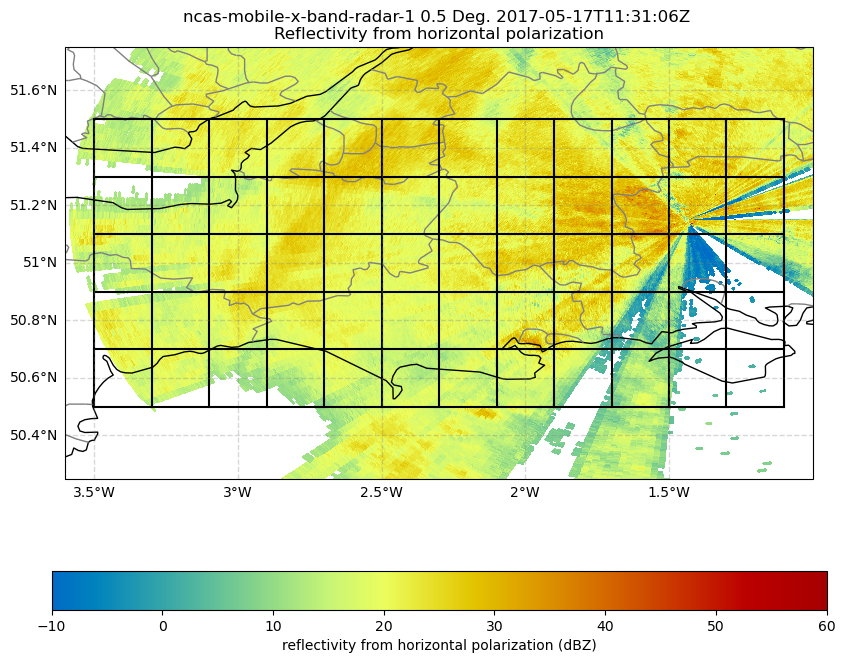

In [8]:
display = pyart.graph.RadarMapDisplay(radar)
for sweep in [0]:#range(radar.nsweeps):
    fig = plt.figure(figsize = (10,8))
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    display.plot_ppi_map(variable, ax=ax, resolution='10m', vmin=vmin, vmax=vmax, sweep=sweep, colorbar_orient='horizontal', cmap=colourmap)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      draw_labels=True,
                      linewidth=1, 
                      color='gray', 
                      alpha=0.3,
                      linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    for l in outer_lines:
        xs = [ float(l[0].split(',')[0]), float(l[1].split(',')[0]) ]
        ys = [ float(l[0].split(',')[1]), float(l[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
    for l in h_lines:
        xs = [ float(l[0].split(',')[0]), float(l[1].split(',')[0]) ]
        ys = [ float(l[0].split(',')[1]), float(l[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
    for l in v_lines:
        xs = [ float(l[0].split(',')[0]), float(l[1].split(',')[0]) ]
        ys = [ float(l[0].split(',')[1]), float(l[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
    plt.xlim([-3.6,-1])
    plt.ylim([50.25,51.75])
    plt.show()
    plt.close()

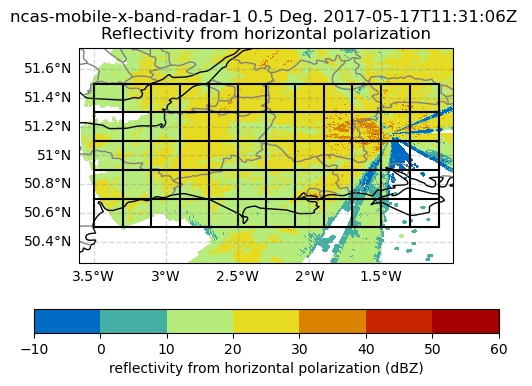

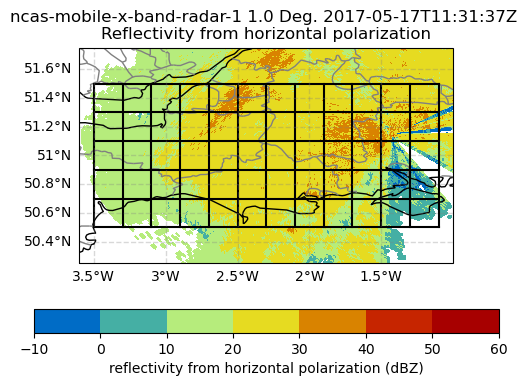

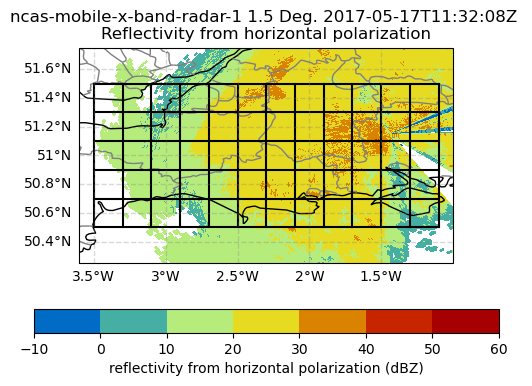

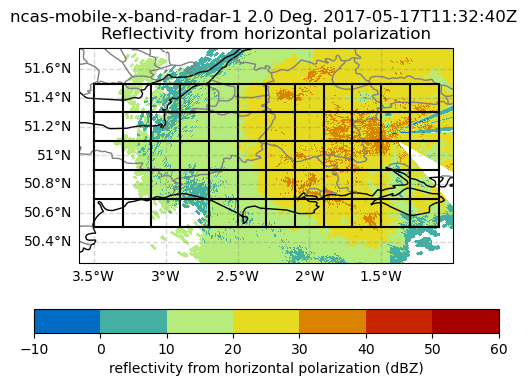

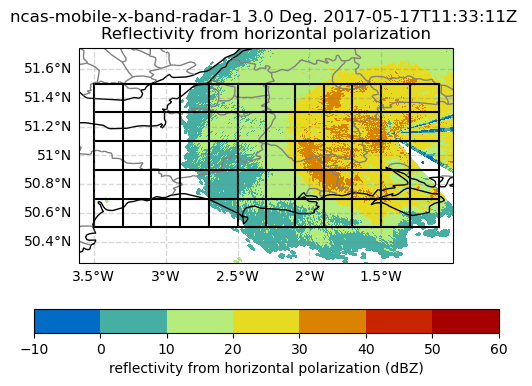

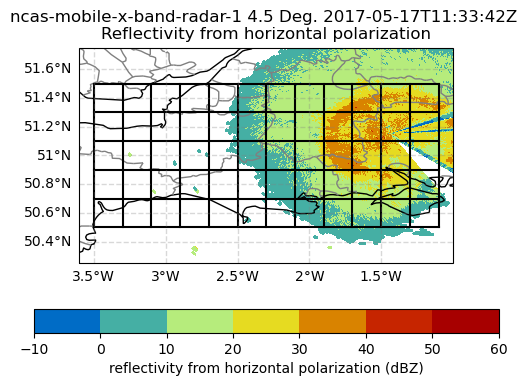

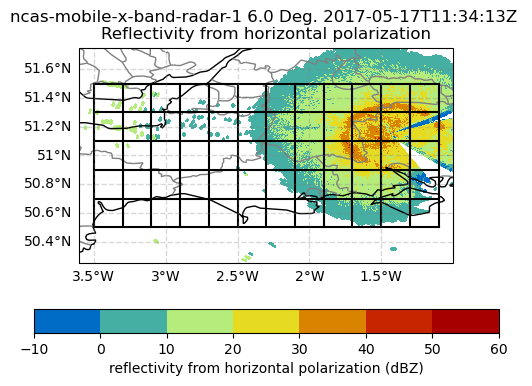

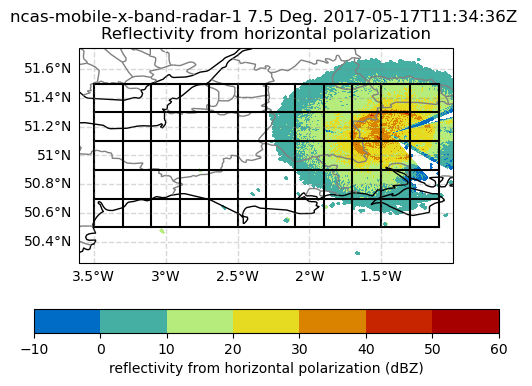

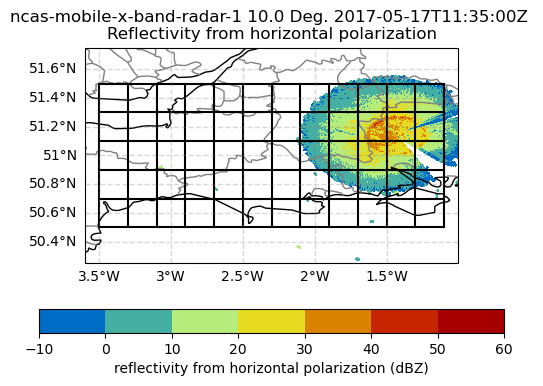

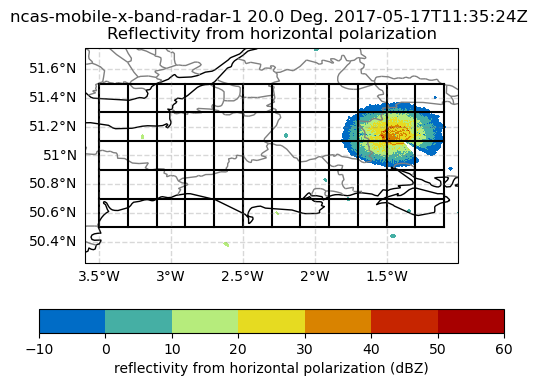

In [9]:
small_cmap = mpl.colormaps[colourmap].resampled(num_colours)
cmap = ListedColormap(small_cmap(range(num_colours)))

display = pyart.graph.RadarMapDisplay(radar)
for sweep in range(radar.nsweeps):
    fig = plt.figure(figsize = (6,4))
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    display.plot_ppi_map(variable, ax=ax, resolution='10m', vmin=vmin, vmax=vmax, sweep=sweep, colorbar_orient='horizontal', cmap=cmap)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      draw_labels=True,
                      linewidth=1, 
                      color='gray', 
                      alpha=0.3,
                      linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    for l in outer_lines:
        xs = [ float(l[0].split(',')[0]), float(l[1].split(',')[0]) ]
        ys = [ float(l[0].split(',')[1]), float(l[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
    for l in h_lines:
        xs = [ float(l[0].split(',')[0]), float(l[1].split(',')[0]) ]
        ys = [ float(l[0].split(',')[1]), float(l[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
    for l in v_lines:
        xs = [ float(l[0].split(',')[0]), float(l[1].split(',')[0]) ]
        ys = [ float(l[0].split(',')[1]), float(l[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
    plt.xlim([-3.6,-1])
    plt.ylim([50.25,51.75])
    plt.show()
    plt.close()

<hr style="background-color:red;height:6px" />
<h3>RHI</h3>

In [10]:
radar_file = '/gws/nopw/j04/ncas_radar_vol2/data/xband/chilbolton/cfradial/calib_v2/rhi/20170517/ncas-mobile-x-band-radar-1_chilbolton_20170517-113654_RHI_v1.nc'

In [11]:
radar = pyart.io.read(radar_file)

In [12]:
variable = 'dBZ'
vmin = var_scales[radar_name][variable]['min']
vmax = var_scales[radar_name][variable]['max']
num_colours = var_scales[radar_name][variable]['num_colours']
colourmap = var_scales[radar_name][variable]['colourmap']

/home/users/earjham/miniconda3/envs/plotkml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


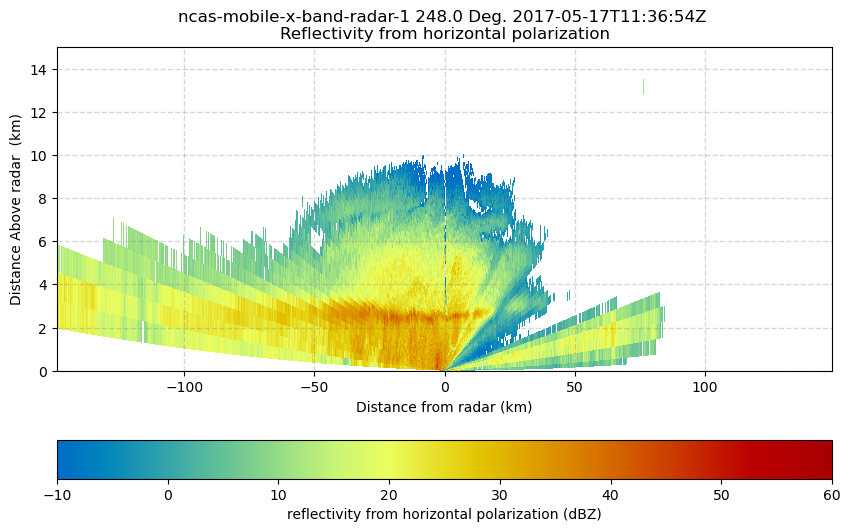

In [13]:
fig = plt.figure(figsize = (10,6))
ax = plt.subplot(111)
display = pyart.graph.RadarDisplay(radar)
display.plot_rhi(variable, ax=ax, vmin=vmin, vmax=vmax, colorbar_orient='horizontal', cmap=colourmap)
plt.grid(linewidth=1, color='gray', alpha=0.3, linestyle='--')
plt.ylim([0,15])
plt.show()

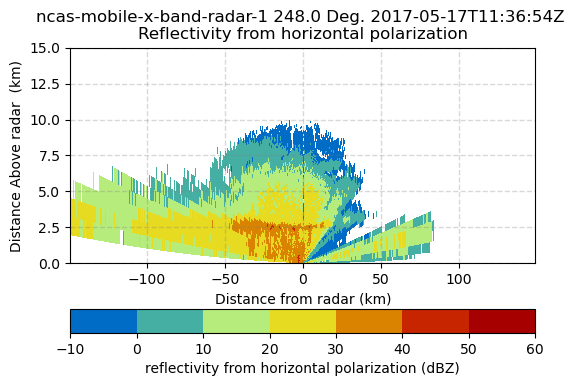

In [14]:
small_cmap = mpl.colormaps[colourmap].resampled(num_colours)
cmap = ListedColormap(small_cmap(range(num_colours)))

fig = plt.figure(figsize = (6,4))
ax = plt.subplot(111)
display = pyart.graph.RadarDisplay(radar)
display.plot_rhi(variable, ax=ax, vmin=vmin, vmax=vmax, cmap=cmap, colorbar_orient='horizontal')
plt.grid(linewidth=1, color='gray', alpha=0.3, linestyle='--')
plt.ylim([0,15])
plt.show()

Note (to myself mostly), cross section from south west ish (left) to north east ish (right)

In [16]:
radar.gate_latitude['data'].shape

(360, 993)

In [17]:
radar.fields['dBZ']['data'].shape

(360, 993)

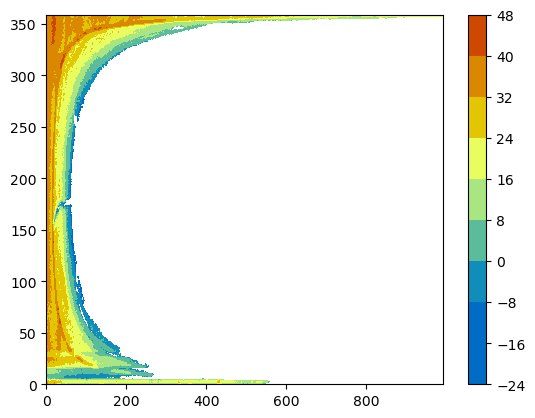

In [33]:
plt.contourf(radar.fields['dBZ']['data'], vmin=-10, vmax=60, cmap='pyart_HomeyerRainbow')
plt.colorbar();

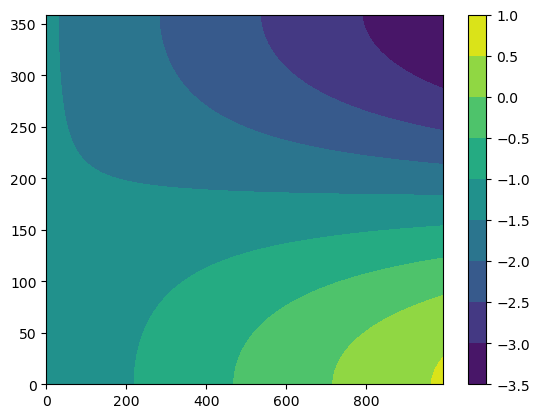

In [34]:
plt.contourf(radar.gate_longitude['data'])
plt.colorbar();